In [1]:
best_features = [
    "age",
    "on_thyroxine",
    "goitre",
    "TSH",
    "TSH_measured",
    "T3",
    "TT4_measured",
    "TT4",
    "FTI",
    "referral_source",
    "classes"
]


In [2]:
import pandas as pd
df  = pd.read_csv('data/Preprocessed_thyroid_data.csv')

In [3]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'referral_source', 'classes'],
      dtype='object')

In [4]:
data = df[best_features]

In [5]:
data.head()

,age,on_thyroxine,goitre,TSH,TSH_measured,T3,TT4_measured,TT4,FTI,referral_source,classes
0,41,f,f,1.30,t,2.50,t,125,109,SVHC,negative
1,23,f,f,4.10,t,2.00,t,102,110,other,negative
2,46,f,f,0.98,t,2.02,t,109,120,other,negative
3,70,t,f,0.16,t,1.90,t,175,110,other,negative
4,70,f,f,0.72,t,1.20,t,61,70,SVI,negative


In [6]:
data.to_csv("./data/finalTrain_new.csv",index=False)

In [7]:
data = pd.read_csv("./data/finalTrain_new.csv")

In [8]:
data.head()

,age,on_thyroxine,goitre,TSH,TSH_measured,T3,TT4_measured,TT4,FTI,referral_source,classes
0,41,f,f,1.30,t,2.50,t,125,109,SVHC,negative
1,23,f,f,4.10,t,2.00,t,102,110,other,negative
2,46,f,f,0.98,t,2.02,t,109,120,other,negative
3,70,t,f,0.16,t,1.90,t,175,110,other,negative
4,70,f,f,0.72,t,1.20,t,61,70,SVI,negative


In [9]:
data['classes'].unique()

array(['negative', 'compensated hypothyroid', 'primary hypothyroid',
       'secondary hypothyroid'], dtype=object)

In [10]:
data['classes'] = df['classes'].map({
    "compensated hypothyroid": 0,
    "negative": 1,
    "primary hypothyroid": 2,
    "secondary hypothyroid": 3
})

In [11]:
data.head()

,age,on_thyroxine,goitre,TSH,TSH_measured,T3,TT4_measured,TT4,FTI,referral_source,classes
0,41,f,f,1.30,t,2.50,t,125,109,SVHC,1
1,23,f,f,4.10,t,2.00,t,102,110,other,1
2,46,f,f,0.98,t,2.02,t,109,120,other,1
3,70,t,f,0.16,t,1.90,t,175,110,other,1
4,70,f,f,0.72,t,1.20,t,61,70,SVI,1


In [12]:
data.to_csv("./data/finalTrain_new2.csv",index=False)

In [1]:
import pandas as pd
data = pd.read_csv("./data/finalTrain_new2.csv")

In [2]:
data.head()

,age,on_thyroxine,goitre,TSH,TSH_measured,T3,TT4_measured,TT4,FTI,referral_source,classes
0,41,f,f,1.30,t,2.50,t,125,109,SVHC,1
1,23,f,f,4.10,t,2.00,t,102,110,other,1
2,46,f,f,0.98,t,2.02,t,109,120,other,1
3,70,t,f,0.16,t,1.90,t,175,110,other,1
4,70,f,f,0.72,t,1.20,t,61,70,SVI,1


In [3]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols =data.select_dtypes(include='object').columns
numerical_cols = data.select_dtypes(exclude='object').columns

In [4]:
for i in categorical_cols:
    print(data[i].value_counts())

on_thyroxine
f    2341
t     325
Name: count, dtype: int64
goitre
f    2641
t      25
Name: count, dtype: int64
TSH_measured
t    2387
f     279
Name: count, dtype: int64
TT4_measured
t    2486
f     180
Name: count, dtype: int64
referral_source
other    1584
SVI       693
SVHC      267
STMW       91
SVHD       31
Name: count, dtype: int64


In [5]:
classes_encode = data['classes'].unique()

In [6]:
classes_encode

array([1, 0, 2, 3], dtype=int64)

In [7]:
categorical_cols

Index(['on_thyroxine', 'goitre', 'TSH_measured', 'TT4_measured',
       'referral_source'],
      dtype='object')

In [8]:
numerical_cols

Index(['age', 'TSH', 'T3', 'TT4', 'FTI', 'classes'], dtype='object')

In [9]:
for i in categorical_cols:
    print(i , data[i].unique())

on_thyroxine ['f' 't']
goitre ['f' 't']
TSH_measured ['t' 'f']
TT4_measured ['t' 'f']
referral_source ['SVHC' 'other' 'SVI' 'STMW' 'SVHD']


In [10]:
on_thyroxine_categories = ['f','t']
goitre_categories = ['f','t']
TSH_measured_categories = ['f','t']
TT4_measured_categories = ['f','t']
referral_source_categories = ['SVHC','other','SVI','STMW','SVHD']
# classes_categories = ['negative' 'compensated hypothyroid' 'primary hypothyroid'
#  'secondary hypothyroid']

In [11]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [12]:
# Define numerical columns and categorical features with ordinal encoding
numerical_cols = ['age', 'TSH', 'T3', 'TT4', 'FTI']
ordinal_encoded_features = ['on_thyroxine', 'goitre', 'TSH_measured', 'TT4_measured', 'referral_source']
ordinal_categories = [on_thyroxine_categories, goitre_categories, TSH_measured_categories, TT4_measured_categories, referral_source_categories]

# Numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Ordinal Encoded Pipeline
ordinal_encoded_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(categories=ordinal_categories)),
    ('scaler', StandardScaler())
])

# Preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numerical_cols),
    ('ordinal_encoded_pipeline', ordinal_encoded_pipeline, ordinal_encoded_features)
])

In [13]:
# Train-test split
X = data.drop('classes', axis=1)
y = data['classes']

In [14]:
X.head()

,age,on_thyroxine,goitre,TSH,TSH_measured,T3,TT4_measured,TT4,FTI,referral_source
0,41,f,f,1.30,t,2.50,t,125,109,SVHC
1,23,f,f,4.10,t,2.00,t,102,110,other
2,46,f,f,0.98,t,2.02,t,109,120,other
3,70,t,f,0.16,t,1.90,t,175,110,other
4,70,f,f,0.72,t,1.20,t,61,70,SVI


In [15]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2661    1
2662    1
2663    1
2664    1
2665    1
Name: classes, Length: 2666, dtype: int64

In [16]:
##Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=30)

In [17]:
X_train.head()

,age,on_thyroxine,goitre,TSH,TSH_measured,T3,TT4_measured,TT4,FTI,referral_source
2428,13,f,f,4.67,f,2.02,t,94,103,other
427,24,f,f,2.60,t,1.30,t,67,76,SVI
1292,19,f,f,3.70,t,3.00,t,68,80,SVI
2498,58,f,f,0.80,t,2.20,t,96,111,SVI
1977,32,f,f,0.70,t,2.90,t,90,88,SVHC


In [18]:
X_test

,age,on_thyroxine,goitre,TSH,TSH_measured,T3,TT4_measured,TT4,FTI,referral_source
526,60,f,f,12.00,t,2.20,t,71,51,SVI
2421,29,f,f,0.80,t,3.10,t,169,114,STMW
2032,14,f,f,0.78,t,2.20,t,78,89,SVI
656,48,f,f,0.42,t,2.50,t,93,82,other
2097,70,f,f,0.90,t,2.60,t,92,103,other
...,...,...,...,...,...,...,...,...,...,...
1186,65,f,f,1.30,t,2.00,t,105,83,SVHC
2628,63,f,f,3.30,t,0.90,t,82,75,other
1263,19,f,f,58.00,t,2.02,t,74,82,other
630,51,f,f,0.04,t,3.70,t,169,148,SVI


In [19]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0,max_iter=10)

In [21]:
lr_model=lr.fit(X_train,y_train)

d:\iNeuronPyTasks\InternShipProject\ThyroidDiseaseDetection\thyroidenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
y_pred = lr.predict(X_test)

In [23]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
y_pred.shape

(800,)

In [25]:
y_test

526     2
2421    1
2032    1
656     1
2097    1
       ..
1186    1
2628    1
1263    0
630     1
1220    1
Name: classes, Length: 800, dtype: int64

In [26]:
y_test.shape

(800,)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95125


In [29]:
from sklearn.metrics import accuracy_score,classification_report
# Model training score
print(f"Model Score : {lr.score(X_train,y_train)}")

#model prediction
y_pred = lr.predict(X_test)

# Accuacy Score
print(f"Accuracy Score : {accuracy_score(y_test,y_pred)}")

#Classification Report
print(f"Classification Report : \n {classification_report(y_test,y_pred)}")

Model Score : 0.9528403001071811
Accuracy Score : 0.95125
Classification Report : 
               precision    recall  f1-score   support

           0       0.60      0.31      0.41        39
           1       0.96      0.99      0.98       740
           2       0.81      0.62      0.70        21

    accuracy                           0.95       800
   macro avg       0.79      0.64      0.70       800
weighted avg       0.94      0.95      0.94       800



In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

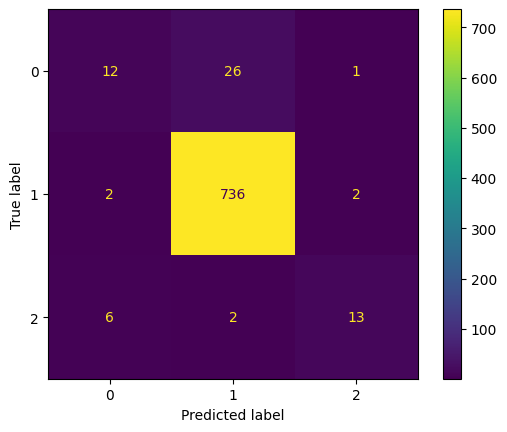

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()